In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile/automobileEDA.csv
/kaggle/input/used-car-price-prediction/automobileEDA.csv


# **Performing Exploratory analysis on Automobile data**

**What are the main characteristics which have the most impact on the car price?**<br>
**We will be exploring features on automobile dataset to find more about the features that will have most impact when predicting a car price**

In [6]:
#loading data
df = pd.read_csv("../input/used-car-price-prediction/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**We see that there are 29 columns so its not feasible to take every feature into account so we would be taking the most common features into account**

# **Analyzing Individual Feature Patterns using Visualization**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [8]:
# list the data types for each column
print(df.dtypes)
#we do this to understand the datatype of features better so as to correctly visualize 

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


**ENGINE SIZE**
<br>
*Engine size is continous variable so we use scatterplot plus fitted regression lines for the data*

(0.0, 53530.73080780072)

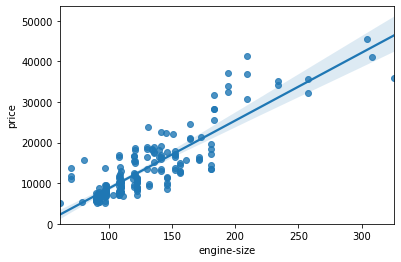

In [9]:
#lets find the scatterplot of engine size vs price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

*As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.*

In [10]:
df[["engine-size", "price"]].corr()
#We can examine the correlation between 'engine-size' and 'price' 

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


*Correlation value between engine size and price is approximately 0.87 which indicates that engine size could be a possible predictor of price*

**HIGHWAY-MPG**

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

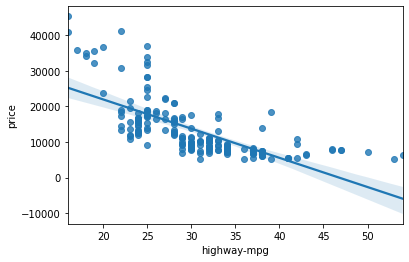

In [11]:
#lets see if highway-mpg is a good predictor or not
sns.regplot(x="highway-mpg", y="price", data=df)

*As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables which means Highway mpg could potentially be a predictor of price.*

In [12]:
#lets find correlation value between highway-mpg and price
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


*correlaton value between highway-mpg and price is approx -0.70 indicating it could also be a good predictor*

**PEAK-RPM**

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

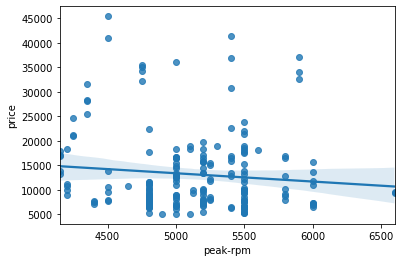

In [13]:
#Let's see if "Peak-rpm" as a predictor variable of "price"
sns.regplot(x="peak-rpm", y="price", data=df)

*Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.*

**BODY-STYLE**
<br>
*Body style is categorical value so we use box plot*

<AxesSubplot:xlabel='body-style', ylabel='price'>

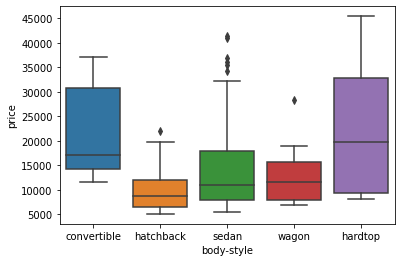

In [14]:
#Let's look at the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=df)

*We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price*

In [73]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


**ENGINE-LOCATION**

<AxesSubplot:xlabel='engine-location', ylabel='price'>

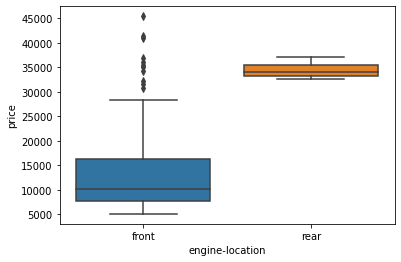

In [15]:
#Let's examine engine "engine-location" and "price"
sns.boxplot(x="engine-location", y="price", data=df)


*we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price*

In [61]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


*we can see that there are only 3 rear engine car and rest are front engine so engine location data is skewed therefore it would not be a good predictor*

**DRIVE-WHEELS**

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

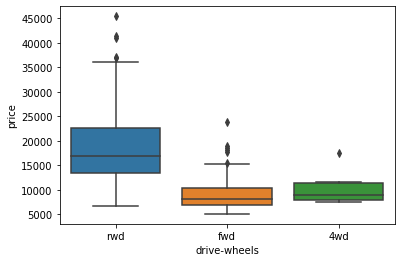

In [16]:
#Let's examine "drive-wheels" and "price".
sns.boxplot(x="drive-wheels", y="price", data=df)

*Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price*

In [63]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


*Data is not equally distributed but its not also skewed so could be a potential predictor*

In [74]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

*We want to know, on average, which type of drive wheel is most valuable, so we group "drive-wheels" and then average them.*

In [75]:
df_group_one = df[['drive-wheels','body-style','price']]
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


**FUEL SYSTEM**

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

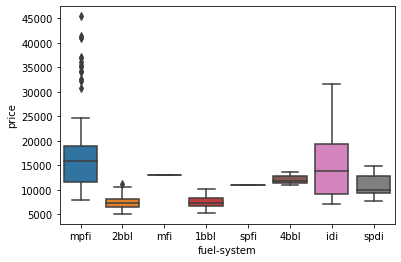

In [17]:
##Let's examine "fuel-system" and "price"
sns.boxplot(x="fuel-system", y="price", data=df)

*Here we can see that different types of fuel systems are overlapping so it would not a good predictor of price*

In [62]:
df['fuel-system'].value_counts().to_frame()

,fuel-system
mpfi,92
2bbl,64
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


*here also data is somewhat skewed towards "mpfi" and "2bbl" so not a good predictor of price*

**CITY-MPG**

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

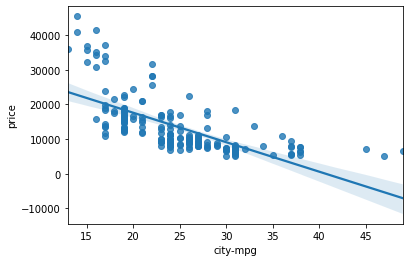

In [18]:
#lets examine "city-mpg" and "price"
sns.regplot(x="city-mpg", y="price",data=df)

*As city-mpg goes down the price goes down indicating a inverse/negative relation between them*

In [19]:
#lets find correlation between city-mpg and price to establish it as a good predictor
df[["city-mpg","price"]].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


*correlation value between city-mpg and price is approx -0.68 which indicates that it could be a good predictor of price*

**HORSEPOWER**

<AxesSubplot:xlabel='horsepower', ylabel='price'>

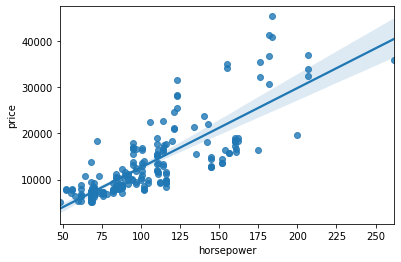

In [20]:
#lets examine "horsepower" and "price"
sns.regplot(x="horsepower", y="price",data=df)

*As horsepower is going up the price goes up,lets find correlation between them to establish it as a good predictor of price*

In [21]:
##lets find correlation between horsepower and price to establish it as a good predictor
df[["horsepower","price"]].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


*There is an approx correlation value of 0.80 ndicating that horsepower could be a good predictor of price*

# **CALCULATING Pearson Correlation Coefficient and P-value**

**This would give us a measure of interdependence between variables so that we could use those variables for perdiction**

In [76]:
from scipy import stats

**Wheel-base vs Price**

In [77]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


*Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong*

**Horsepower vs Price**

In [78]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


*Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)*

**Length vs Price**

In [79]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


*Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691)*

**Width vs Price**

In [80]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


*Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751)*

**Curb-weight vs Price**

In [81]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


*Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834)*

**Engine-size vs Price**

In [82]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


*Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872)*

**Bore vs Price**

In [83]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


*Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521)*

**City-mpg vs Price**

In [84]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


*Since the p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong*

**Highway-mpg vs Price**

In [85]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


*Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong*

# Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>